<a href="https://colab.research.google.com/github/robbi621/temu_kembali_citra/blob/main/tugas_6/tugas_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/content/drive/MyDrive/pembelajaranmesin/flower_color_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/flower_color_images'


test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

test_flowers_dir = os.path.join(test_dir, 'flowers')
test_flower_image_dir = os.path.join(test_dir, 'flower_image')

train_flowers_dir = os.path.join(train_dir, 'flowers')
train_flower_image_dir = os.path.join(train_dir, 'flower_image')

In [ ]:
import cv2
import numpy as np

# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
# Gather data validation
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

Test Data =  (813, 150, 150, 3)
Test Label =  (813,)
Train Data =  (813, 150, 150, 3)
Train Label =  (813,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [28 47 34]
Data setelah di-normalisasi  [0.10980392 0.18431373 0.13333334]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['flowers' 'flowers' 'flowers' 'flowers' 'flowers' 'flowers' 'flowers'
 'flowers' 'flowers' 'flowers']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [ ]:
# training the model for 10 epochs
history = model.fit(x_train, y_train, batch_size = 20, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
41/41 [==============================] - 16s 377ms/step - loss: 0.6121 - acc: 0.7245 - val_loss: 0.5735 - val_acc: 0.7417
Epoch 2/10
41/41 [==============================] - 15s 371ms/step - loss: 0.5815 - acc: 0.7417 - val_loss: 0.5664 - val_acc: 0.7417
Epoch 3/10
41/41 [==============================] - 15s 371ms/step - loss: 0.5661 - acc: 0.7417 - val_loss: 0.5601 - val_acc: 0.7417
Epoch 4/10
41/41 [==============================] - 15s 371ms/step - loss: 0.5695 - acc: 0.7417 - val_loss: 0.5490 - val_acc: 0.7417
Epoch 5/10
41/41 [==============================] - 15s 371ms/step - loss: 0.5715 - acc: 0.7331 - val_loss: 0.5554 - val_acc: 0.7417
Epoch 6/10
41/41 [==============================] - 15s 371ms/step - loss: 0.5595 - acc: 0.7417 - val_loss: 0.5470 - val_acc: 0.7417
Epoch 7/10
41/41 [==============================] - 15s 370ms/step - loss: 0.5422 - acc: 0.7405 - val_loss: 0.5058 - val_acc: 0.7417
Epoch 8/10
41/41 [==============================] - 15s 374ms/step - 

<h3>Evaluasi Model</h3>

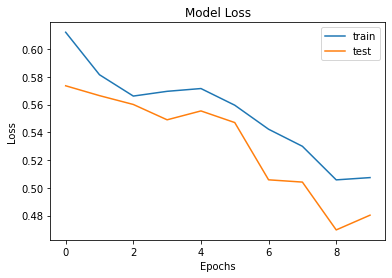

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

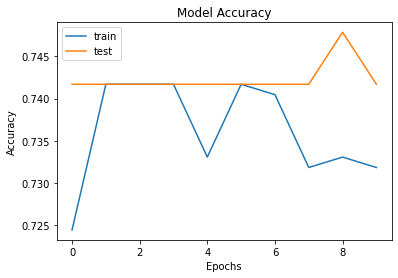

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       210
           1       0.74      1.00      0.85       603

    accuracy                           0.74       813
   macro avg       0.62      0.50      0.43       813
weighted avg       0.68      0.74      0.63       813



In [ ]:
from keras.models import save_model
model = save_model(model,'tugas6.h5')